In [2]:
import numpy as np
import pandas as pd
import json
import glob
import os
import seaborn as sns
import string
from snpmatch.core import snp_genotype, snpmatch, results
import matplotlib.pyplot as plt

project_fol = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/"

plate_design = pd.read_csv(project_fol + "plates_repeat_crosses_modified.csv", sep = ";")
plate_design.index = plate_design['plate'].astype(str) + "." + plate_design['row'] + plate_design['col'].astype(str)


### Check out NGS_Barcodes ipynb for more details on how this file is created.
indices_barcodes_all = pd.read_csv( "/users/rahul.pisupati/mygit/jupyter_notebooks/008.barcodes_NGS/INDEXES_ALL_SETS.csv", index_col=0)

# #### join the row and column for the indices 
# t_indices = {}
# for ef in indices_barcodes_all['set'].unique():
#     t_indices[int(ef.replace("set", ""))] = indices_barcodes_all.loc[indices_barcodes_all['set'] == ef, 'row'].astype(str) + "_" + indices_barcodes_all.loc[indices_barcodes_all['set'] == ef, 'col'].astype(str)
# indices.loc[:, 'INDEX set ' + str(ef) ].astype(str) + "_" + indices.iloc[:, np.where(indices.columns.values == 'INDEX set ' + str(ef))[0][0] + 1].astype(str)

## Copy only specific raw bams from the raw.data folder

Sequencing happened in one of the big lanes. 

In [28]:
files_path = "/groups/nordborg/projects/cegs/rahul/014.fieldData/006.plates.2021.bsseq/001.rawdata/"


cross_genotypes = results.FollowSNPmatch(csv_snpmatch= { "db996": "/groups/nordborg/projects/cegs/rahul/014.fieldData/006.plates.2021.bsseq/bi/bismark_wgbs/snps_bcftools/snpmatch_swedes996/intermediate_modified.csv"}) 
cross_genotypes.snpmatch_db996.index = cross_genotypes.snpmatch_db996.index.str.replace("_TAIR10_wholeGenome_bismark_bt2_pe", "")

json_file = glob.glob( files_path + "*_barcodes.json" )
bam_files = glob.glob( files_path + "*181510*bam" )
bam_files = pd.Series( bam_files ).apply( os.path.basename )

sample_csv = pd.DataFrame( columns=['seqlane_id','row_id', 'col_id', 'barcode_set'] )
for ef in bam_files:
    t_ef_split = os.path.splitext(ef)[0].split("_")
    t_index = np.where(indices_barcodes_all['barcode'] == t_ef_split[2])[0]
    if len(t_index) > 1:
        print("Caution!!!")
    elif len(t_index) == 1:
        sample_csv.loc[os.path.splitext(ef)[0], "col_id"] = indices_barcodes_all.iloc[t_index[0],:]['col']
        sample_csv.loc[os.path.splitext(ef)[0], "row_id"] = indices_barcodes_all.iloc[t_index[0],:]['row']
        sample_csv.loc[os.path.splitext(ef)[0], "barcode_set"] = indices_barcodes_all.iloc[t_index[0],:]['set']
        sample_csv.loc[os.path.splitext(ef)[0], "seqlane_id"] = t_ef_split[0] + "_" + t_ef_split[1]
    else:
        sample_csv.loc[os.path.splitext(ef)[0], "col_id"] = "NA"
        sample_csv.loc[os.path.splitext(ef)[0], "row_id"] = "NA"
        sample_csv.loc[os.path.splitext(ef)[0], "barcode_set"] = "set0"
        sample_csv.loc[os.path.splitext(ef)[0], "seqlane_id"] = "NA"
        
sample_csv.index = sample_csv.index.str.replace(".bam$", "")
sample_csv['seqlane_id'] = sample_csv['seqlane_id'] + "_" + sample_csv['barcode_set'].astype(str)   #### Here, I added both sequencing plate ID to the barcode set ID, you could change be back if needed
sample_csv['barcode_set'] = sample_csv['barcode_set'].str.replace( "set", "" ).astype(int)

print("#samples: %s " % sample_csv.shape[0])



cross_genotypes.snpmatch_db996['info'] = "rand"

possible_parents = cross_genotypes.snpmatch_db996['TopHitAccession'][cross_genotypes.snpmatch_db996['Score'] > 0.987]
cross_genotypes.snpmatch_db996.loc[possible_parents.index, 'info'] = "P_" + possible_parents
sample_csv['snpmatch_score'] = cross_genotypes.snpmatch_db996['Score']
sample_csv['snpmatch'] = cross_genotypes.snpmatch_db996['info']
sample_csv['nsnps'] = cross_genotypes.snpmatch_db996['SNPsCalled']

#samples: 91 


In [36]:
sample_csv.index.str.contains("GGCACTAAGG")

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

# Sequencing plate design -- and genotyping

In [3]:
# files_path = "/groups/nordborg/projects/cegs/rahul/014.fieldData/005.plates.2020.bsseq/001.raw.data/"

# cross_genotypes = results.FollowSNPmatch(csv_snpmatch= { "db996" : "/groups/nordborg/projects/cegs/rahul/014.fieldData/005.plates.2020.bsseq/002.methylseq/snps_bcftools/snpmatch_swedes200_996/intermediate_modified.csv"})

In [3]:
## Sequencing round 1 -- Viktoria sent T4_P1 and T16_P1 for sequencing
# data_path = "/groups/nordborg/projects/cegs/rahul/001.genotype.manus.crosses/008.reSeq_2020/"
# files_path = data_path + "/001.rawdata/HNF3KDSXY_20201223B_demux_3_R10802_R10802_20201231/"

#___________________________________________

## Sequencing round 2 -- T4_P2 and T16_P2
## Looked like they were sequenced in two rounds.. 
# I would like to check if they have the same genotypes / plate design
# Later I would be merging the bam files

# files_path = project_fol + "/001.rawdata/H3H7YDRXY_20210309B_demux_1_R11038_20210311/"
# files_path = project_fol + "001.rawdata/H*/"#3H7YDRXY_20210309B_demux_2_R11038_20210311/"  

## Sequencing round 3 -- T4_P1 and T16_P4
## they were sequenced in two rounds.. 
files_path = project_fol + "001.rawdata/H*/"


## Hopefully, final round of sequencing (March, 2022).-- T16_P2 and mixed plate
## they were sequenced in two rounds.. 
# files_path = project_fol + "001.rawdata/H7MWJDSX3.march2022/"
# cross_genotypes = results.FollowSNPmatch(csv_snpmatch= { "db996": project_fol +  "007.bismark_raw/bismark_non_directional/snps_bcftools/snpmatch_inbred/intermediate_modified.csv"}, csv_csmatch= { "db996": project_fol +  "007.bismark_raw/bismark_non_directional/snps_bcftools/snpmatch_cross/intermediate_modified.csv"}) 



#### Loading SNPmatch output, generally one file for all the samples.
# cross_genotypes = results.FollowSNPmatch(csv_csmatch= { "db996": project_fol +  "003.methylseq_bismark_clipped/snps_bcftools_raw/csmatch_swedes996/intermediate_modified.csv"}) 

In [4]:
json_file = glob.glob( files_path + "*_barcodes.json" )
bam_files = glob.glob( files_path + "*bam" )
bam_files = pd.Series( bam_files ).apply( os.path.basename )

sample_csv = pd.DataFrame( columns=['seqlane_id','row_id', 'col_id', 'barcode_set'] )
for ef in bam_files:
    t_ef_split = os.path.splitext(ef)[0].split("_")
    t_index = np.where(indices_barcodes_all['barcode'] == t_ef_split[2])[0]
    if len(t_index) > 1:
        print("Caution!!!")
    else:
        sample_csv.loc[os.path.splitext(ef)[0], "col_id"] = indices_barcodes_all.iloc[t_index[0],:]['col']
        sample_csv.loc[os.path.splitext(ef)[0], "row_id"] = indices_barcodes_all.iloc[t_index[0],:]['row']
        sample_csv.loc[os.path.splitext(ef)[0], "barcode_set"] = indices_barcodes_all.iloc[t_index[0],:]['set']
        sample_csv.loc[os.path.splitext(ef)[0], "seqlane_id"] = t_ef_split[0] + "_" + t_ef_split[1]
        
sample_csv.index = sample_csv.index.str.replace(".bam$", "")
sample_csv['seqlane_id'] = sample_csv['seqlane_id'] + "_" + sample_csv['barcode_set'].astype(str)   #### Here, I added both sequencing plate ID to the barcode set ID, you could change be back if needed
# sample_csv['barcode_set'] = sample_csv['barcode_set'].str.replace( "set", "" ).astype(int)

print("#samples: %s " % sample_csv.shape[0])

#samples: 2097 


/tmp/ipykernel_7854/3398136823.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_csv.index = sample_csv.index.str.replace(".bam$", "")


In [6]:
## Given SNPmatch inbred output
cross_genotypes.snpmatch_db996['info'] = "rand" 
possible_parents = cross_genotypes.snpmatch_db996['TopHitAccession'][cross_genotypes.snpmatch_db996['Score'] > 0.975]
cross_genotypes.snpmatch_db996.loc[possible_parents.index, 'info'] = "P_" + possible_parents

sample_csv['snpmatch_score'] = cross_genotypes.snpmatch_db996['Score']
sample_csv['snpmatch'] = cross_genotypes.snpmatch_db996['info']
sample_csv['nsnps'] = cross_genotypes.snpmatch_db996['SNPsinfoAcc']

#### 
## Given SNPmatch cross output
# cross_genotypes.csmatch_db996['info'] = "rand" 
# possible_parents = cross_genotypes.csmatch_db996['TopHit'][cross_genotypes.csmatch_db996['Score'] > 0.98]
# cross_genotypes.csmatch_db996.loc[possible_parents.index, 'info'] = "P_" + possible_parents

# sample_csv['snpmatch_score'] = cross_genotypes.csmatch_db996['Score']
# sample_csv['snpmatch'] = cross_genotypes.csmatch_db996['info']
# sample_csv['nsnps'] = cross_genotypes.csmatch_db996['SNPsCalled']

NameError: name 'cross_genotypes' is not defined

In [5]:
# ### for the first round the sequencing
# T4_P4 was sequenced insted of T4_P1. so I changed the genotype expected 
barcode_set = {"HNF3KDSXY_3#138390_set1": "T4_P1", "HNF3KDSXY_3#138394_set2": "T16_P1"}

### Second round of sequencing, happened in two lanes -- barcode set 1 for temperature 4
barcode_set.update( {"H3H7YDRXY_1#144455_set1": "T4_P2", "H3H7YDRXY_2#144455_set1": "T4_P2", "H3H7YDRXY_1#144456_set2": "T16_oldP2", "H3H7YDRXY_2#144456_set2": "T16_oldP2"} )

### Third round of sequencing, also happened in two lanes
# 148027                 Rahul_4-4                        4
# 148028                 Rahul_4-16                       5
barcode_set.update( {"HY5W7DMXX_1#148027_set4": "T4_P4", "HY5W7DMXX_2#148027_set4": "T4_P4", "HY5W7DMXX_1#148028_set5": "T16_P4", "HY5W7DMXX_2#148028_set5": "T16_P4"} )

### Fourth round of sequencing.
barcode_set.update( {"HHHY7DSX2_2#169198_set8": "T16_P3", "HHHY7DSX2_2#169199_set3": "T4_P3", "HHHY7DSX2_2#169202_set2": "T4_P5", "HHHY7DSX2_2#169203_set6": "T16_P5", "HHHY7DSX2_3#169198_set8": "T16_P3", "HHHY7DSX2_3#169199_set3": "T4_P3", "HHHY7DSX2_3#169202_set2": "T4_P5", "HHHY7DSX2_3#169203_set6": "T16_P5"} )


### Hopefully final round of sequencing,
barcode_set.update( {"H7MWJDSX3_1#181510_uniq_set3": "T16_P2", "H7MWJDSX3_2#181510_uniq_set3": "T16_P2", "H7MWJDSX3_1#188467_uniq_set2": "mix_P6", "H7MWJDSX3_2#188467_uniq_set2": "mix_P6"  } )

sample_csv['plate_id'] = pd.Series(barcode_set).reindex(sample_csv['seqlane_id']).values

In [7]:
## Command to get the conversion rate for all the samples
## grep conv info/conversion_rate_H* | sed 's/^info\/conversion_rate_//' | sed 's/\.txt\:The non\-conversion rate is /,/' | sed 's/\%$//'  > conversion_rate_samples.csv

conversion_rates = pd.read_csv( "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/003.methylseq_bismark_clipped/conversion_rate_samples.csv", header=None, index_col=0)
# conversion_rates[1] = conversion_rates[1].str.replace("%", "").astype(float)
sample_csv["conv_rate"] = conversion_rates[1]

t_plate_conv = sample_csv.groupby( 'seqlane_id' ).max()
t_plate_conv['plate'] = pd.Series(barcode_set)

In [8]:
## Number of reads in the alignment
# command to get the stats
# grep "Total count of deduplicated leftover sequences" bismark_deduplicated/logs/* | sed 's/bismark_deduplicated\/logs\///' | sed 's/_1_val_1_bismark_bt2_pe.deduplication_report.txt\:/\t/' | sed 's/Total count of deduplicated leftover sequences\: //' | sed 's/ (/\t/' | sed 's/ of total)//' > bismark_deduplicated_sample_stats.csv

read_mapping_stats = pd.read_csv( "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/003.methylseq_bismark_clipped/bismark_deduplicated_sample_stats.csv", header=None, index_col=0, sep = "\t")

sample_csv.loc[:,'nreads'] = read_mapping_stats.reindex( sample_csv.index ).iloc[:,0]
sample_csv.loc[:,'per_reads_deduplicated'] = read_mapping_stats.reindex( sample_csv.index ).iloc[:,1].str.replace("%", "").astype(float)

In [72]:
sample_csv[(sample_csv[plate_to_check[1]] == plate_to_check[0]) & (sample_csv['col_id'] == 12)].sort_values("row_id")

,seqlane_id,row_id,col_id,barcode_set,snpmatch_score,snpmatch,nsnps,plate_id,conv_rate
H7MWJDSX3_1#188467_ACGGTCCAACTCTTACATCA,H7MWJDSX3_1#188467_uniq_set2,A,12,uniq_set2,0.932273,rand,643669.0,mixed,NaN
H7MWJDSX3_1#188467_GTAACTTGGTCGCCATACCT,H7MWJDSX3_1#188467_uniq_set2,B,12,uniq_set2,0.937866,rand,718574.0,mixed,NaN
H7MWJDSX3_1#188467_AGCGCCACACCTAATGTCTT,H7MWJDSX3_1#188467_uniq_set2,C,12,uniq_set2,0.935327,rand,619794.0,mixed,NaN
H7MWJDSX3_1#188467_TGCTACTGCCCAACCGGAGG,H7MWJDSX3_1#188467_uniq_set2,D,12,uniq_set2,0.934310,rand,686486.0,mixed,NaN
H7MWJDSX3_1#188467_CAACACCGCAGGCAGTAGCA,H7MWJDSX3_1#188467_uniq_set2,E,12,uniq_set2,0.934516,rand,701071.0,mixed,NaN
H7MWJDSX3_1#188467_CACCTTAATCTTAGGATAGA,H7MWJDSX3_1#188467_uniq_set2,F,12,uniq_set2,0.933152,rand,798600.0,mixed,NaN
H7MWJDSX3_1#188467_TTGAATGTTGCGCAATCTAG,H7MWJDSX3_1#188467_uniq_set2,G,12,uniq_set2,0.939996,rand,702971.0,mixed,NaN
H7MWJDSX3_1#188467_CCGGTAACACGAGTTGTACT,H7MWJDSX3_1#188467_uniq_set2,H,12,uniq_set2,0.927156,rand,756026.0,mixed,NaN


mixed


row_id,A,B,C,D,E,F,G,H
col_id,,,,,,,,
1,0.936118,0.932563,0.939587,0.936726,0.942643,0.927123,0.933741,0.941595
2,0.932790,0.937022,0.938514,0.942013,0.933288,0.938474,0.933647,0.963718
3,0.937948,0.935852,0.939118,0.939485,0.983586,0.939773,0.931261,0.946471
4,0.932565,0.938108,0.930149,0.940675,0.934647,0.927505,0.936905,0.941192
5,0.927899,0.928465,0.949551,0.954941,0.930014,0.932096,0.939709,0.935800
6,0.937177,0.939505,0.942119,0.937876,0.934883,0.912733,0.935646,0.981091
7,0.935321,0.943633,0.946393,0.937975,0.963790,0.929908,0.937034,0.952094
8,0.929272,0.946505,0.942651,0.940565,0.937492,0.963317,0.965512,0.937097
9,0.946468,0.937658,0.934587,0.941543,0.943072,0.948385,0.937494,0.939191


row_id,A,B,C,D,E,F,G,H
col_id,,,,,,,,
1,rand,rand,rand,rand,rand,rand,rand,rand
2,rand,rand,rand,rand,rand,rand,rand,rand
3,rand,rand,rand,rand,P_6043,rand,rand,rand
4,rand,rand,rand,rand,rand,rand,rand,rand
5,rand,rand,rand,rand,rand,rand,rand,rand
6,rand,rand,rand,rand,rand,rand,rand,P_6043
7,rand,rand,rand,rand,rand,rand,rand,rand
8,rand,rand,rand,rand,rand,rand,rand,rand
9,rand,rand,rand,rand,rand,rand,rand,rand


Expected genotypes


col
row


row_id,A,B,C,D,E,F,G,H
col_id,,,,,,,,
1,532547.0,629458.0,587824.0,579861.0,520092.0,719626.0,646570.0,518120.0
2,612883.0,603180.0,571428.0,512515.0,632314.0,527665.0,609961.0,609885.0
3,492939.0,514152.0,514635.0,528848.0,477709.0,521657.0,680688.0,529262.0
4,683210.0,604308.0,597042.0,549233.0,628674.0,687164.0,603444.0,508419.0
5,763008.0,722595.0,549957.0,367542.0,685767.0,688999.0,554208.0,594692.0
6,619673.0,531678.0,445637.0,622269.0,639116.0,903278.0,612037.0,417631.0
7,597688.0,468640.0,444927.0,567417.0,679610.0,630911.0,591811.0,570930.0
8,656983.0,530688.0,546149.0,402779.0,622577.0,550313.0,740608.0,594023.0
9,512443.0,587498.0,602842.0,527496.0,461935.0,501834.0,466034.0,531648.0


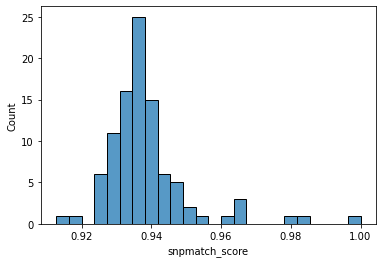

In [48]:
plate_to_check =  ("H7MWJDSX3_1#188467_uniq_set2", 'seqlane_id')
# plate_to_check = ("T4_P1", 'plate_id')
print( "%s" % pd.Series(barcode_set)[plate_to_check[0]] )

sns.histplot( sample_csv.loc[sample_csv[plate_to_check[1]] == plate_to_check[0], "snpmatch_score"] )


display( sample_csv.loc[sample_csv[plate_to_check[1]] == plate_to_check[0]].pivot(index='col_id',columns='row_id',values='snpmatch_score') )
display( sample_csv.loc[sample_csv[plate_to_check[1]] == plate_to_check[0]].pivot(index='col_id',columns='row_id',values='snpmatch') )
print("Expected genotypes")
display( plate_design.loc[ plate_design['plate'] == pd.Series(barcode_set)[plate_to_check[0]] ].pivot(index='row',columns='col',values='genotype') )
display( sample_csv.loc[sample_csv[plate_to_check[1]] == plate_to_check[0]].pivot(index='col_id',columns='row_id',values='nsnps') )

(0.0, 1.0)

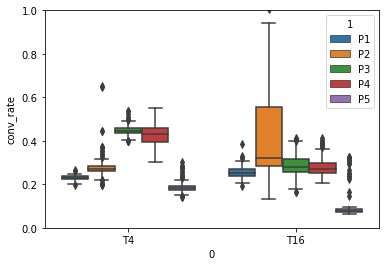

In [23]:
sns.boxplot(data = sample_csv, y = "conv_rate", hue = sample_csv['plate_id'].str.split("_", expand = True).iloc[:,1],x = sample_csv['plate_id'].str.split("_", expand = True).iloc[:,0], hue_order=('P' + pd.Series(np.arange(1,6)).astype(str)).to_list())

plt.ylim((0, 1))

(0.0, 1.0)

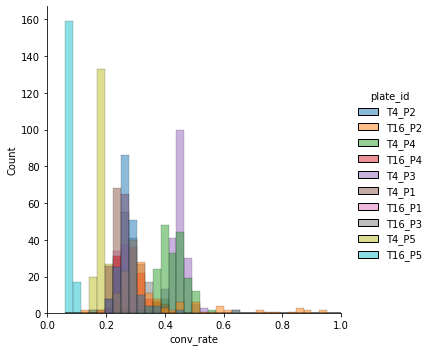

In [22]:
sns.displot(data = sample_csv, x = "conv_rate", hue="plate_id")

plt.xlim((0, 1))

## Adding row (A..H) and column (1..12) for the samples and their genotypes

In [6]:
sample_csv = sample_csv[~sample_csv['plate_id'].isna()]
sample_csv = sample_csv[sample_csv['plate_id'].isin( plate_design['plate'].unique() )]

#### Old way of decoding the required indicies.. have problems
# for ef in sample_csv.iterrows():
#     t_ix = np.where(t_indices[ ef[1]['barcode_set'] ] == ef[1]['row_id'] + "_" + ef[1]['col_id'] )[0][0]
#     sample_csv.loc[ ef[0], 'ROW' ] = indices.iloc[t_ix]['ROW']
#     sample_csv.loc[ ef[0], 'COL' ] = int(indices.iloc[t_ix]['COL'])
#     sample_csv.loc[ ef[0], 'sample_id'] = sample_csv.loc[ef[0], 'plate_id'] + "." + indices.iloc[t_ix]['ROW'] + indices.iloc[t_ix]['COL'].astype(str)
#     sample_csv.loc[ef[0], 'genotype'] = plate_design.loc[sample_csv.loc[ ef[0], 'sample_id'], 'genotype']
# plate_design.loc[plate_design.index.values == sample_csv.loc[ ef[0], 'sample_id'].split("_", 1)[1], 'genotype'].values

for ef in sample_csv.iterrows():
    # t_index = indices_barcodes.loc[(indices_barcodes["set" + str(ef[1]['barcode_set']) + "_row"].astype(str) == str(ef[1]['row_id'])) & ( indices_barcodes["set" + str(ef[1]['barcode_set']) + "_col"].astype(str) == str(ef[1]['col_id'])  )].iloc[0,:].astype(str)
    # sample_csv.loc[ ef[0], 'ROW' ] = t_index['ROW']
    # sample_csv.loc[ ef[0], 'COL' ] = t_index['COL']
    # sample_csv.loc[ ef[0], 'sample_id_nogenotype'] = sample_csv.loc[ef[0], 'plate_id'] + "." + t_index['ROW'] + t_index['COL']
    sample_csv.loc[ ef[0], 'sample_id_nogenotype'] = sample_csv.loc[ef[0], 'plate_id'] + "." + ef[1]['row_id'] + str(ef[1]['col_id'])
    sample_csv.loc[ef[0], 'genotype'] = plate_design.loc[sample_csv.loc[ ef[0], 'sample_id_nogenotype'], 'genotype']

# sample_csv['COL'] = sample_csv['COL'].astype(int)
sample_csv.loc[:,'sample_id'] = sample_csv['sample_id_nogenotype'] + "_" + sample_csv['genotype']

# sample_csv.to_csv( "sample_stats.csv" )

In [71]:
### Submission file to NCBI SRA


final_sample_csv = pd.DataFrame(index = np.unique(sample_csv['sample_id'].values) )
final_sample_csv['organism'] = 'Arabidopsis thaliana'
final_sample_csv['tissue'] = 'leaf'
final_sample_csv['developmental stage'] = '7-10 leave rosette'

ef_data = pd.Series(final_sample_csv.index).str.split("_", expand = True)
final_sample_csv['sample_id'] = (ef_data.iloc[:,0] + '_' + ef_data.iloc[:,1]).values
final_sample_csv['genotype'] = (ef_data.iloc[:,2] + '_' + ef_data.iloc[:,3]).values
final_sample_csv['treatment'] = pd.Series(['4C','16C','mix'],index =['T4','T16','mix']).loc[ef_data.iloc[:,0]].values

final_sample_csv['title'] = final_sample_csv['genotype'] + " individual, grown at " + final_sample_csv['treatment']
final_sample_csv['processed data file'] = 'allc_' + final_sample_csv['sample_id'] + '.tsv.gz'
final_sample_csv['raw file'] = ''
final_sample_csv['raw file 2'] = ''


ef_groups = sample_csv.groupby("sample_id").groups
for ef_row in final_sample_csv.iterrows():
    final_sample_csv.loc[ef_row[0],'raw file'] = ef_groups[ef_row[0]][0] + '.bam'
    if len(ef_groups[ef_row[0]]) > 1:
        final_sample_csv.loc[ef_row[0],'raw file 2'] = ef_groups[ef_row[0]][1] + '.bam'

final_sample_csv = final_sample_csv[final_sample_csv['treatment'] != 'mix']

final_sample_csv.to_csv("cache_data/NCBI_SRA_metadata.csv", sep = ";")

In [34]:
# sample_csv.loc[(sample_csv['plate_id'] == "T16_P5") & (sample_csv['row_id'] == "726") & ( sample_csv['col_id'] == "501" )]
plate_to_check =  ("H7MWJDSX3_1#188467_uniq_set2", 'seqlane_id')
print(pd.Series(barcode_set).loc[plate_to_check[0]])

display( sample_csv.loc[sample_csv[plate_to_check[1]] == plate_to_check[0]].pivot(index='col_id',columns='row_id',values='snpmatch') )
display( sample_csv.loc[sample_csv[plate_to_check[1]] == plate_to_check[0]].pivot(index='col_id',columns='row_id',values='nsnps') )
display( sample_csv.loc[sample_csv[plate_to_check[1]] == plate_to_check[0]].pivot(index='col_id',columns='row_id',values='sample_id') )

mix_P6


row_id,A,B,C,D,E,F,G,H
col_id,,,,,,,,
1,rand,rand,rand,rand,rand,rand,rand,rand
2,rand,rand,rand,rand,rand,rand,rand,rand
3,rand,rand,rand,rand,P_6043,rand,rand,rand
4,rand,rand,rand,rand,rand,rand,rand,rand
5,rand,rand,rand,rand,rand,rand,rand,rand
6,rand,rand,rand,rand,rand,rand,rand,P_6043
7,rand,rand,rand,rand,rand,rand,rand,rand
8,rand,rand,rand,rand,rand,rand,rand,rand
9,rand,rand,rand,rand,rand,rand,rand,rand


row_id,A,B,C,D,E,F,G,H
col_id,,,,,,,,
1,532547.0,629458.0,587824.0,579861.0,520092.0,719626.0,646570.0,518120.0
2,612883.0,603180.0,571428.0,512515.0,632314.0,527665.0,609961.0,609885.0
3,492939.0,514152.0,514635.0,528848.0,477709.0,521657.0,680688.0,529262.0
4,683210.0,604308.0,597042.0,549233.0,628674.0,687164.0,603444.0,508419.0
5,763008.0,722595.0,549957.0,367542.0,685767.0,688999.0,554208.0,594692.0
6,619673.0,531678.0,445637.0,622269.0,639116.0,903278.0,612037.0,417631.0
7,597688.0,468640.0,444927.0,567417.0,679610.0,630911.0,591811.0,570930.0
8,656983.0,530688.0,546149.0,402779.0,622577.0,550313.0,740608.0,594023.0
9,512443.0,587498.0,602842.0,527496.0,461935.0,501834.0,466034.0,531648.0


row_id,A,B,C,D,E,F,G,H
col_id,,,,,,,,
1,mix_P6.A1_F2_D1,mix_P6.B1_F2_D2,mix_P6.C1_F2_D2,mix_P6.D1_F2_D2,mix_P6.E1_F1_D2,mix_P6.F1_F2_D2,mix_P6.G1_F2_D2,mix_P6.H1_F2_D2
2,mix_P6.A2_F2_D1,mix_P6.B2_F2_D1,mix_P6.C2_F2_D2,mix_P6.D2_F2_D2,mix_P6.E2_F2_D1,mix_P6.F2_F2_D1,mix_P6.G2_F2_D2,mix_P6.H2_P_6191
3,mix_P6.A3_F2_D2,mix_P6.B3_F2_D2,mix_P6.C3_F2_D2,mix_P6.D3_F2_D2,mix_P6.E3_P_6046,mix_P6.F3_F2_D1,mix_P6.G3_F2_D1,mix_P6.H3_F2_D1
4,mix_P6.A4_F2_D1,mix_P6.B4_F2_D2,mix_P6.C4_F2_D2,mix_P6.D4_F2_D1,mix_P6.E4_F2_D1,mix_P6.F4_F2_D2,mix_P6.G4_F2_D2,mix_P6.H4_F2_D2
5,mix_P6.A5_F2_D2,mix_P6.B5_F2_D1,mix_P6.C5_F2_D2,mix_P6.D5_F2_D2,mix_P6.E5_F2_D1,mix_P6.F5_F2_D1,mix_P6.G5_ID_9601,mix_P6.H5_F2_D1
6,mix_P6.A6_F2_D1,mix_P6.B6_F2_D1,mix_P6.C6_F2_D1,mix_P6.D6_F2_D1,mix_P6.E6_F2_D1,mix_P6.F6_F2_D2,mix_P6.G6_F2_D2,mix_P6.H6_P_6046
7,mix_P6.A7_F2_D2,mix_P6.B7_F2_D2,mix_P6.C7_F2_D1,mix_P6.D7_F2_D1,mix_P6.E7_P_6191,mix_P6.F7_F2_D2,mix_P6.G7_F2_D2,mix_P6.H7_F2_D1
8,mix_P6.A8_F2_D1,mix_P6.B8_F2_D2,mix_P6.C8_F2_D2,mix_P6.D8_F2_D2,mix_P6.E8_F2_D2,mix_P6.F8_P_6191,mix_P6.G8_P_6191,mix_P6.H8_F2_D2
9,mix_P6.A9_F2_D2,mix_P6.B9_F2_D2,mix_P6.C9_F2_D1,mix_P6.D9_F2_D2,mix_P6.E9_F2_D2,mix_P6.F9_F2_D2,mix_P6.G9_F2_D1,mix_P6.H9_F2_D1


## Symbolic link required allc files and VCF files based on the genotypes

In the second and third round of sequencing, plates were sequenced twice with the same DNA.

Here I am merging the two bam files -- which are technical replicates using a nextflow script. Provide the samples csv with sample ID and bam file ID

```bash
nr ~/mygit/qsubScripts/004.bsseq_pipeline/002.methylseq/merge_replicate_bams.nf --sample_ids sample_ids.csv --outdir sym_link_path/aligned_bam
```

In [28]:
sample_csv.loc[:,['sample_id','conv_rate']].to_csv("/groups/nordborg/projects/epiclines/005.manu.crosses.2020/004.design_resolved/sample_conversion_rate.csv", header = True, index = False)

In [39]:
sample_csv['aligned_bam_path'] = project_fol + "003.methylseq_bismark_clipped/bismark_deduplicated/" + sample_csv.index + "_1_val_1_bismark_bt2_pe.deduplicated.bam"
## Create a combined bam file without the genotype so that one can do this again later 
sample_csv.loc[:,["sample_id_nogenotype", 'aligned_bam_path']].to_csv(project_fol + "/003.methylseq_bismark_clipped/sample_ids_nogenotype.csv", header = None , index = None)
##sample_csv.loc[:,['sample_id', 'aligned_bam_path']].to_csv(project_fol + "/003.methylseq_bismark_clipped/sample_ids.csv", header = None , index = None) #.head()

### samples mapped to pacbio 6046
# sample_csv['aligned_bam_path'] = project_fol + "/006.mapping_to_pacbio/002.methylseq_6046x6191/bismark_deduplicated/" + sample_csv.index + "_1_val_1_bismark_bt2_pe.deduplicated.bam"
# sample_csv.loc[:,['sample_id', 'aligned_bam_path']].to_csv( project_fol + "/006.mapping_to_pacbio/002.methylseq_6046x6191/sample_ids.csv", header = None , index = None)


### Create a csv to generate bams plate-wise 
# sample_csv.loc[:,['plate_id', 'aligned_bam_path']].to_csv("/groups/nordborg/projects/epiclines/005.manu.crosses.2020/005.merge_bams_platewise/sample_ids_new2020.csv", header = None , index = None)
# (sample_csv['plate_id'] + "_" + sample_csv['genotype'] + "," + sample_csv['aligned_bam_path']).to_csv( "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/005.merge_bams_platewise/sample_ids_new2020.csv", header = None , index = None )


# sym_link_path = project_fol + "/004.design_resolved/aligned_bam/"
# sym_link_path = project_fol + "/003.methylseq_bismark_clipped/aligned_bam/"
sym_link_path = project_fol + "/006.mapping_to_pacbio/002.methylseq_6046x6191/bismark_merged_bam/"
# sym_link_path = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/006.mapping_to_pacbio/003.mapped_to_6046/merged_bam/"

num_files_linked = 0
### Only symbolic linking the files with sample_id cardinality of 1
for ef in sample_csv.groupby('sample_id').filter(lambda x: len(x) == 1).iterrows():
    os.system( 'ln -s -r  ' + ef[1]['aligned_bam_path'] + " " + sym_link_path + ef[1]['sample_id_nogenotype'] + ".bam" )
    num_files_linked += 1
print("number of files linked: %s" % num_files_linked)

number of files linked: 185


## Process the linked/merged bam files to generate allc files, VCF files. 

Here the bam files only have the plate ID and the position in the file name. 


1. Generate allc files for the given bam files
```{bash}
nr ~/mygit/qsubScripts/004.bsseq_pipeline/002.methylseq/generate_allc_from_bam.nf  --input_bams 'aligned_bam/*bam' --outdir allc_fixed --ref_fasta /users/rahul.pisupati/TAiR10_ARABIDOPSIS/TAIR10_wholeGenome.fasta -resume
```

2. Call SNPs
```{bash}
nr ~/mygit/gmi/nf-haplocaller/snps_bsseq.nf -profile conda --input "aligned_bam/*bam" --known_sites /groups/nordborg/projects/field_experiments/007.pilot.sequencing/018.genotyping.by.plate/997.Swedes.220.10May2016/02.2.3M_Swedes220/02_2.3M_Swedes220.175k.prior15.gauss4.ts99.5.BIALLELIC.targets.tsv.gz --fasta ~/TAiR10_ARABIDOPSIS/TAIR10_wholeGenome.fasta  --outdir snps_bcftools
```


After this step I will symbolic files with the genotype information to use them further.

In [9]:
# raw_data_path = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/003.methylseq_bismark_clipped/"
# final_data_path = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/004.design_resolved/"


# final_bam_files = glob.glob( raw_data_path + "/aligned_bam/*bam" )
# final_bam_files = pd.DataFrame( {"bam_path": final_bam_files} ) #.apply( os.path.basename )
# final_bam_files['bam_id'] = final_bam_files['bam_path'].apply( os.path.basename ).str.replace( ".bam", "" )

# final_bam_files['final_id'] = sample_csv.loc[:, ['sample_id_nogenotype', 'sample_id']].drop_duplicates().set_index( "sample_id_nogenotype" ).loc[ final_bam_files['bam_id'], 'sample_id' ].values

# print(final_bam_files.shape[0])


raw_data_path = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/003.methylseq_bismark_clipped/"
final_data_path = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/004.design_resolved/"


final_bam_files = glob.glob( raw_data_path + "/aligned_bam/mix*bam" )
final_bam_files = pd.DataFrame( {"bam_path": final_bam_files} ) #.apply( os.path.basename )
final_bam_files['bam_id'] = final_bam_files['bam_path'].apply( os.path.basename ).str.replace( ".bam", "" )

final_bam_files['final_id'] = sample_csv.loc[:, ['sample_id_nogenotype', 'sample_id']].drop_duplicates().set_index( "sample_id_nogenotype" ).loc[ final_bam_files['bam_id'], 'sample_id' ].values

print(final_bam_files.shape[0])

96


In [23]:
## One needs to remove files which are not good here. 

## entire T16_P2 is weird, the empty wells also have some sequencing reads.
final_bam_files = final_bam_files.loc[~final_bam_files['bam_id'].str.startswith("T16_P2")]

In [11]:
num_files_linked = 0
for ef in final_bam_files.iterrows():
    ## link the aligned bam file for SNP calling
    # os.system( 'ln -s -r  ' + ef[1]['bam_path'] + " " + final_data_path + "/aligned_bam/" + ef[1]['final_id'] + ".bam" )
    ## link allc file from methylpy
    # os.system( 'ln -s -r  ' + raw_data_path + "/allc_fixed/allc/allc_" + ef[1]['bam_id'] + ".tsv.gz " + final_data_path + "/allc/allc_" + ef[1]['final_id'] + ".tsv.gz" )
    #### New plate 2022
    # os.system( 'ln -s -r  ' + raw_data_path + "/allc_fixed/allc/allc_" + ef[1]['bam_id'] + ".tsv.gz.idx " + final_data_path + "/allc/allc_" + ef[1]['final_id'] + ".tsv.gz.idx" )

    ## link hdf5 file from methylpy
    # os.system( 'ln -s -r  ' + raw_data_path + "/allc_fixed/hdf5/allc_" + ef[1]['bam_id'] + ".hdf5 " + final_data_path + "/hdf5/allc_" + ef[1]['final_id'] + ".hdf5" )
    #### New plate 2022
    # os.system( 'ln -s -r  ' + raw_data_path + "/bismark_methylation_non-directional/hdf5/" + ef[1]['bam_id'] + "_TAIR10_wholeGenome.bismark.hdf5 " + final_data_path + "/hdf5/allc_" + ef[1]['final_id'] + ".hdf5" )
    
    ## link the VCF file
#     os.system( 'ln -s -r  ' + raw_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['bam_id'] + ".snps.vcf.gz " + final_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['final_id'] + ".snps.vcf.gz" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['bam_id'] + ".snps.vcf.gz.tbi " + final_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['final_id'] + ".snps.vcf.gz.tbi" )
    ### New libraries
    os.system( 'ln -s -r  ' + raw_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['bam_id'] + ".snps.vcf.gz " + final_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['final_id'] + ".snps.vcf.gz" )
    os.system( 'ln -s -r  ' + raw_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['bam_id'] + ".snps.vcf.gz.tbi " + final_data_path + "/snps_bcftools/variants_bcftools/" + ef[1]['final_id'] + ".snps.vcf.gz.tbi" )


    ## need to link the methylation averages as well
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_araport/bedgraph/wma." + ef[1]['bam_id'] + ".CG.bg " + final_data_path + "/wmas_araport/bedgraph/wma." + ef[1]['final_id'] + ".CG.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_araport/bedgraph/wma." + ef[1]['bam_id'] + ".CHG.bg " + final_data_path + "/wmas_araport/bedgraph/wma." + ef[1]['final_id'] + ".CHG.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_araport/bedgraph/wma." + ef[1]['bam_id'] + ".CHH.bg " + final_data_path + "/wmas_araport/bedgraph/wma." + ef[1]['final_id'] + ".CHH.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_cds_genes/bedgraph/wma." + ef[1]['bam_id'] + ".CG.bg " + final_data_path + "/wmas_cds_genes/bedgraph/wma." + ef[1]['final_id'] + ".CG.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_cds_genes/bedgraph/wma." + ef[1]['bam_id'] + ".CHG.bg " + final_data_path + "/wmas_cds_genes/bedgraph/wma." + ef[1]['final_id'] + ".CHG.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_cds_genes/bedgraph/wma." + ef[1]['bam_id'] + ".CHH.bg " + final_data_path + "/wmas_cds_genes/bedgraph/wma." + ef[1]['final_id'] + ".CHH.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_200bp/bedgraph/wma." + ef[1]['bam_id'] + ".CG.bg " + final_data_path + "/wmas_200bp/bedgraph/wma." + ef[1]['final_id'] + ".CG.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_200bp/bedgraph/wma." + ef[1]['bam_id'] + ".CHG.bg " + final_data_path + "/wmas_200bp/bedgraph/wma." + ef[1]['final_id'] + ".CHG.bg" )
#     os.system( 'ln -s -r  ' + raw_data_path + "/wmas_200bp/bedgraph/wma." + ef[1]['bam_id'] + ".CHH.bg " + final_data_path + "/wmas_200bp/bedgraph/wma." + ef[1]['final_id'] + ".CHH.bg" )
    num_files_linked += 1
print("number of files linked: %s" % num_files_linked)

number of files linked: 96


In [14]:
### Creating a BSHAP hdf5 files

import subprocess
bshap_cmd = "bshap generate_h5_1001g -i " + final_data_path

process_to_run = {
#     'cds_cg': bshap_cmd + "/wmas_cds_genes/bedgraph/wma.*CG.bg -o " + final_data_path + "/wmas_cds_genes/wma.all_samples_cds_gbm.CG.hdf5",
#     'cds_chg': bshap_cmd + "/wmas_cds_genes/bedgraph/wma.*CHG.bg -o " + final_data_path + "/wmas_cds_genes/wma.all_samples_cds_gbm.CHG.hdf5",
#     'cds_chh': bshap_cmd + "/wmas_cds_genes/bedgraph/wma.*CHH.bg -o " + final_data_path + "/wmas_cds_genes/wma.all_samples_cds_gbm.CHH.hdf5",
#     'cds_cg_count': bshap_cmd + "/wmas_cds_genes/bedgraph/wma.*CG.bg -d 5 -o " + final_data_path + "/wmas_cds_genes/wma.all_samples_cds_gbm.CG.count.hdf5",
#     'cds_chg_count': bshap_cmd + "/wmas_cds_genes/bedgraph/wma.*CHG.bg -d 5 -o " + final_data_path + "/wmas_cds_genes/wma.all_samples_cds_gbm.CHG.count.hdf5",
#     'cds_chh_count': bshap_cmd + "/wmas_cds_genes/bedgraph/wma.*CHH.bg -d 5 -o " + final_data_path + "/wmas_cds_genes/wma.all_samples_cds_gbm.CHH.count.hdf5",
#     'cg': bshap_cmd + "/wmas_araport/bedgraph/wma.*CG.bg -o " + final_data_path + "/wmas_araport/wma.all_samples.CG.hdf5",
#     'chg': bshap_cmd + "/wmas_araport/bedgraph/wma.*CHG.bg -o " + final_data_path + "/wmas_araport/wma.all_samples.CHG.hdf5",
#     'chh': bshap_cmd + "/wmas_araport/bedgraph/wma.*CHH.bg -o " + final_data_path + "/wmas_araport/wma.all_samples.CHH.hdf5",
#     'cg_count': bshap_cmd + "/wmas_araport/bedgraph/wma.*CG.bg -d 5 -o " + final_data_path + "/wmas_araport/wma.all_samples.CG.count.hdf5",
#     'chg_count': bshap_cmd + "/wmas_araport/bedgraph/wma.*CHG.bg -d 5 -o " + final_data_path + "/wmas_araport/wma.all_samples.CHG.count.hdf5",
#     'chh_count': bshap_cmd + "/wmas_araport/bedgraph/wma.*CHH.bg -d 5 -o " + final_data_path + "/wmas_araport/wma.all_samples.CHH.count.hdf5",
    'cg': bshap_cmd + "/wmas_200bp/bedgraph/wma.*CG.bg -o " + final_data_path + "/wmas_200bp/wma.all_samples.CG.hdf5",
    'chg': bshap_cmd + "/wmas_200bp/bedgraph/wma.*CHG.bg -o " + final_data_path + "/wmas_200bp/wma.all_samples.CHG.hdf5",
    'chh': bshap_cmd + "/wmas_200bp/bedgraph/wma.*CHH.bg -o " + final_data_path + "/wmas_200bp/wma.all_samples.CHH.hdf5",
    'cg_count': bshap_cmd + "/wmas_200bp/bedgraph/wma.*CG.bg -d 5 -o " + final_data_path + "/wmas_200bp/wma.all_samples.CG.count.hdf5",
    'chg_count': bshap_cmd + "/wmas_200bp/bedgraph/wma.*CHG.bg -d 5 -o " + final_data_path + "/wmas_200bp/wma.all_samples.CHG.count.hdf5",
    'chh_count': bshap_cmd + "/wmas_200bp/bedgraph/wma.*CHH.bg -d 5 -o " + final_data_path + "/wmas_200bp/wma.all_samples.CHH.count.hdf5",
}
out_processes = []
for ef in process_to_run.keys():
    out_processes.append( subprocess.Popen( process_to_run[ef], shell=True) )

    
for p in out_processes:
    p.wait()

## Merge VCF files direction wise to get D1 and D2 VCF 

I have merged the VCF files for each direction separately and did filter for sites segregating in each direction 

```{bash}
bcftools merge --threads 4 variants_bcftools/*F2_D1.snps.vcf.gz | bcftools view -i 'F_MISSING <= 0.8 && MAF>=0.05 ' | bcftools reheader -s samples.ids.withgenotypes.csv | bcftools view -M2 -v snps -O z -o f2s_completeSet.rawids.maf_filtered.D1.vcf.gz 
## or
bcftools view -S f2s_completeSet.samplesD1.txt f2s_completeSet.qual_filtered.vcf.gz  | bcftools view -i 'F_MISSING <= 0.8 && MAF>=0.05 ' | bcftools reheader -s samples.ids.withgenotypes.csv | bcftools view -M2 -v snps -O z -o f2s_completeSet.maf_filtered.D1.vcf.gz 
```

You might need to do `bcftools reheader` to add the genotype for the files


```{bash}
bcftools reheader -s samples.ids.withgenotypes.csv f2s_completeSet.rawids.maf_filtered.D1.vcf.gz | bcftools view -O z -o f2s_completeSet.maf_filtered.D1.vcf.gz
```

In [93]:
# t_sample_sheet.groupby('plate_col').mean().sort_values("nreads")


bad_plates_to_reseq = ['T16_P2', 'T16_P4', 'T16_P5', 'T4_P1', 'T4_P3', 'T4_P4']

In [90]:
t_sample_sheet = sample_csv.copy()


t_sample_sheet['plate_col'] = (sample_csv['plate_id'] + ":COL" + sample_csv['COL'].astype(str))
# .unique()

In [145]:

# np.random.seed(4)
np.random.choice( t_sample_sheet.loc[t_sample_sheet['plate_id'].isin( bad_plates_to_reseq )  ]['plate_col'].unique(), 12 )

array(['T16_P4:COL6', 'T16_P2:COL1', 'T4_P1:COL3', 'T16_P5:COL6',
       'T4_P1:COL6', 'T16_P4:COL1', 'T4_P3:COL2', 'T4_P3:COL9',
       'T4_P3:COL1', 'T16_P4:COL4', 'T16_P4:COL1', 'T16_P4:COL11'],
      dtype=object)

In [ ]:
t4p3_2, t4p4_6, t4p3_12,  t4p1_6, t4p4_8, t4p1_3, t16p1_12,, t16p4_5, t16p4_7, t16p4_2, t16p5_4, t16p5_10

In [130]:
import string

In [162]:
pd.DataFrame( {"a": "T4_P1." + pd.Series(list(string.ascii_uppercase[0:8])) + "10" } )

,a
0,T4_P1.A10
1,T4_P1.B10
2,T4_P1.C10
3,T4_P1.D10
4,T4_P1.E10
5,T4_P1.F10
6,T4_P1.G10
7,T4_P1.H10


## Do you call parents correctly?

In [2]:
final_genotypes = results.FollowSNPmatch(csv_csmatch= { "db996": project_fol +  "004.design_resolved/snps_bcftools/csmatch_swedes996/intermediate_modified.csv"}) 

final_genotypes.csmatch_db996['fileid'] = final_genotypes.csmatch_db996.index 

In [33]:
# final_genotypes.csmatch_db996.loc[ final_genotypes.csmatch_db996['Score'] > 0.98 , ]
# final_genotypes.csmatch_db996.loc[final_genotypes.csmatch_db996.index.str.contains( "P_" ),]

In [3]:
final_genotypes.csmatch_db996['plate'] = pd.Series(final_genotypes.csmatch_db996.index).str.split( ".", expand = True ).iloc[:,0].values
t_ix = pd.Series(final_genotypes.csmatch_db996.index).str.split( "_", expand = True ).iloc[:,1].str.split( ".", expand = True ).iloc[:,1]
final_genotypes.csmatch_db996['ROW'] = np.array([ef[0] for ef in t_ix])
final_genotypes.csmatch_db996['COL'] = np.array([ef[1:] for ef in t_ix], dtype = "int")


final_genotypes.csmatch_db996['info'] = "rand"
possible_parents = final_genotypes.csmatch_db996['TopHit'][final_genotypes.csmatch_db996['Score'] > 0.985]
final_genotypes.csmatch_db996.loc[possible_parents.index, 'info'] = "P_" + possible_parents

final_genotypes.csmatch_db996['obs:exp'] = final_genotypes.csmatch_db996['info'] + ":" + final_genotypes.csmatch_db996['fileid']

In [4]:
final_genotypes.csmatch_db996['plate'].value_counts()

T16_P2    96
T16_P1    96
T4_P4     96
T4_P1     96
T4_P5     96
T4_P3     96
T16_P5    96
T4_P2     96
T16_P3    96
T16_P4    95
Name: plate, dtype: int64

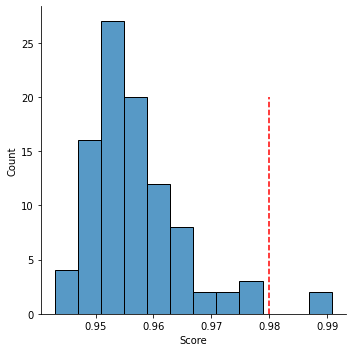

In [16]:
sns.displot(final_genotypes.csmatch_db996.loc[final_genotypes.csmatch_db996['plate'] ==  "T16_P1","Score"])

plt.plot( (0.98, 0.98), (0, 20), 'r--' )

plt.show()

In [ ]:
### 27th April -- using SNPmatch analysis 
### Looks like T4_P2 and T16_P2 were swapped.. you need to check 
### SNPmatch 
## T16_P1 --- methylation levels ok -- SNPmatch ok
## T4_P1 --  methylation levels not ok -- SNPmatch ok
#also has to be P1 -- but methylation levels make it look like T16. 

## T16_P2 -- methylation levels ok - SNPmatch not ok  (might be an old plate)  -- T16_P2 is actually missing
## T4_P2 -- methylation levels ok -- snpmatch ok ### this seems to be wrong by ancestry 


## T16_P4 -- methylation levels ok -- SNPmatch ok
## T4_P4 -- methylation levels are spread. -- SNPmatch okay

In [30]:
final_genotypes.csmatch_db996.groupby( "plate" ).mean()['SNPsCalled']

plate
T16_P1    327144.385417
T16_P2    107885.281250
T16_P3    438942.625000
T16_P4    212076.568421
T16_P5     78666.604167
T4_P1     130171.833333
T4_P2     127673.864583
T4_P3     381222.250000
T4_P4     257509.708333
T4_P5     365629.885417
Name: SNPsCalled, dtype: float64

In [77]:
plate_of_interest = "T16_P2"

print(final_genotypes.csmatch_db996.loc[final_genotypes.csmatch_db996['plate'] == plate_of_interest,].pivot(index='ROW',columns='COL',values='SNPsCalled'))

print(final_genotypes.csmatch_db996.loc[final_genotypes.csmatch_db996['plate'] == plate_of_interest ,].pivot(index='ROW',columns='COL',values='obs:exp'))

# print(final_genotypes.csmatch_db996.loc[final_genotypes.csmatch_db996['plate'] == plate_of_interest ,].pivot(index='ROW',columns='COL',values='fileid'))

print(final_genotypes.csmatch_db996.loc[final_genotypes.csmatch_db996['plate'] == plate_of_interest ,].pivot(index='ROW',columns='COL',values='Score'))

COL      1       2       3       4       5       6       7       8       9   \
ROW                                                                           
A     52440   85701   96328   39445   91305  128253  120590   58289   93553   
B    130768   48432  169451  105516  112430  131288  156411  145165  141693   
C    103929   60461   88591   35507   67547  138358  119966  138492  119549   
D    104165  138414  115959  134495   96176  167105  156487   58193  139996   
E     67486   84130  110847  111550   98373  127542  112942   39801   35765   
F    101140   99939  114847  114642  139464  147036  106938  141716  149918   
G    103023  104349   60674   90345  100183  123471  120887   98724  102046   
H     92350  131019  109930  128340  135402  152207  156711  131625  133236   

COL      10      11      12  
ROW                          
A    116628  118314   39561  
B     41922  127208   76977  
C    138504   85284   81976  
D      5197  130040  147625  
E    142867  117402  136508  